In [4]:
#import 
import json
import os
import glob
import pandas as pd 
from pyxlsb import open_workbook
#read in dataset
rest_date=pd.read_csv("C:/Users/emccall/Downloads/restaurant-revenue-prediction/train.csv")


In [9]:
#analyze column names
print(rest_date.columns)

Index(['Id', 'Open Date', 'City', 'City Group', 'Type', 'P1', 'P2', 'P3', 'P4',
       'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15',
       'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25',
       'P26', 'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35',
       'P36', 'P37', 'revenue'],
      dtype='object')


In [10]:
#see what the data looks like
print(rest_date.head(10))

   Id   Open Date            City  City Group Type  P1   P2   P3   P4  P5  \
0   0  07/17/1999        İstanbul  Big Cities   IL   4  5.0  4.0  4.0   2   
1   1  02/14/2008          Ankara  Big Cities   FC   4  5.0  4.0  4.0   1   
2   2  03/09/2013      Diyarbakır       Other   IL   2  4.0  2.0  5.0   2   
3   3  02/02/2012           Tokat       Other   IL   6  4.5  6.0  6.0   4   
4   4  05/09/2009       Gaziantep       Other   IL   3  4.0  3.0  4.0   2   
5   5  02/12/2010          Ankara  Big Cities   FC   6  6.0  4.5  7.5   8   
6   6  10/11/2010        İstanbul  Big Cities   IL   2  3.0  4.0  4.0   1   
7   7  06/21/2011        İstanbul  Big Cities   IL   4  5.0  4.0  5.0   2   
8   8  08/28/2010  Afyonkarahisar       Other   IL   1  1.0  4.0  4.0   1   
9   9  11/16/2011          Edirne       Other   IL   6  4.5  6.0  7.5   6   

   ...  P29  P30  P31  P32  P33  P34  P35  P36  P37    revenue  
0  ...  3.0    5    3    4    5    5    4    3    4  5653753.0  
1  ...  3.0    0    0 

In [27]:
#tasks left
#Analyze if there are missing values, and if all the values in the dataset make sense 
#Code indicator variable sfor categories
#Run a mondel to find the optimal amount of variables to use

#create a dataset with only rows with at least one missing value
#to do so, drop records wih any missing value, and then use the index from that dataset to create a dataset with the dropped records


rest_date_no_na=rest_date.dropna(thresh=1)
only_na = rest_date[~rest_date.index.isin(rest_date_no_na.index)]

print(only_na)

rest_date_no_na_b=rest_date.dropna()
print(rest_date_no_na_b, rest_date)


Empty DataFrame
Columns: [Id, Open Date, City, City Group, Type, P1, P2, P3, P4, P5, P6, P7, P8, P9, P10, P11, P12, P13, P14, P15, P16, P17, P18, P19, P20, P21, P22, P23, P24, P25, P26, P27, P28, P29, P30, P31, P32, P33, P34, P35, P36, P37, revenue]
Index: []

[0 rows x 43 columns]
      Id   Open Date        City  City Group Type  P1   P2   P3   P4  P5  ...  \
0      0  07/17/1999    İstanbul  Big Cities   IL   4  5.0  4.0  4.0   2  ...   
1      1  02/14/2008      Ankara  Big Cities   FC   4  5.0  4.0  4.0   1  ...   
2      2  03/09/2013  Diyarbakır       Other   IL   2  4.0  2.0  5.0   2  ...   
3      3  02/02/2012       Tokat       Other   IL   6  4.5  6.0  6.0   4  ...   
4      4  05/09/2009   Gaziantep       Other   IL   3  4.0  3.0  4.0   2  ...   
..   ...         ...         ...         ...  ...  ..  ...  ...  ...  ..  ...   
132  132  06/25/2008     Trabzon       Other   FC   2  3.0  3.0  5.0   4  ...   
133  133  10/12/2006       İzmir  Big Cities   FC   4  5.0  4.0  4.0 

In [20]:
#examine unique values of a variable
#load all of the columns into a list
column_list=rest_date.columns.tolist()
#loop through each of the column values, and print the unique values from the column
for var_name in column_list:
    print(var_name, ":", rest_date[var_name].unique())

#print(type(column_list))

#rest_date['Open Date'].unique()

Id : [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136]
Open Date : ['07/17/1999' '02/14/2008' '03/09/2013' '02/02/2012' '05/09/2009'
 '02/12/2010' '10/11/2010' '06/21/2011' '08/28/2010' '11/16/2011'
 '08/09/2013' '05/22/2012' '02/28/2013' '10/16/2010' '12/29/2011'
 '02/07/2012' '01/07/2000' '11/08/2009' '04/21/2012' '08/16/2011'
 '08/25/2010' '01/25/2014' '07/01/2006' '06/03/2009' '09/20/2009'
 '12/23/2011' '02/23/2010' '10/09/1999' '01/28/1998' '10/13/2006'
 '12/01/2008' '12/31/2012' '01

In [5]:
new_data=pd.get_dummies(rest_date, columns=['City', 'City Group', 'Type' ])


print(new_data.columns)

Index(['Id', 'Open Date', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9',
       'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P19',
       'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26', 'P27', 'P28', 'P29',
       'P30', 'P31', 'P32', 'P33', 'P34', 'P35', 'P36', 'P37', 'revenue',
       'City_Adana', 'City_Afyonkarahisar', 'City_Amasya', 'City_Ankara',
       'City_Antalya', 'City_Aydın', 'City_Balıkesir', 'City_Bolu',
       'City_Bursa', 'City_Denizli', 'City_Diyarbakır', 'City_Edirne',
       'City_Elazığ', 'City_Eskişehir', 'City_Gaziantep', 'City_Isparta',
       'City_Karabük', 'City_Kastamonu', 'City_Kayseri', 'City_Kocaeli',
       'City_Konya', 'City_Kütahya', 'City_Kırklareli', 'City_Muğla',
       'City_Osmaniye', 'City_Sakarya', 'City_Samsun', 'City_Tekirdağ',
       'City_Tokat', 'City_Trabzon', 'City_Uşak', 'City_İstanbul',
       'City_İzmir', 'City_Şanlıurfa', 'City Group_Big Cities',
       'City Group_Other', 'Type_DT', 'Type_FC', 'Type_IL']

In [6]:
reg_res_data=new_data.drop(columns=['Id'], axis=1)
print(reg_res_data.columns)

Index(['Open Date', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9',
       'P10', 'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P19',
       'P20', 'P21', 'P22', 'P23', 'P24', 'P25', 'P26', 'P27', 'P28', 'P29',
       'P30', 'P31', 'P32', 'P33', 'P34', 'P35', 'P36', 'P37', 'revenue',
       'City_Adana', 'City_Afyonkarahisar', 'City_Amasya', 'City_Ankara',
       'City_Antalya', 'City_Aydın', 'City_Balıkesir', 'City_Bolu',
       'City_Bursa', 'City_Denizli', 'City_Diyarbakır', 'City_Edirne',
       'City_Elazığ', 'City_Eskişehir', 'City_Gaziantep', 'City_Isparta',
       'City_Karabük', 'City_Kastamonu', 'City_Kayseri', 'City_Kocaeli',
       'City_Konya', 'City_Kütahya', 'City_Kırklareli', 'City_Muğla',
       'City_Osmaniye', 'City_Sakarya', 'City_Samsun', 'City_Tekirdağ',
       'City_Tokat', 'City_Trabzon', 'City_Uşak', 'City_İstanbul',
       'City_İzmir', 'City_Şanlıurfa', 'City Group_Big Cities',
       'City Group_Other', 'Type_DT', 'Type_FC', 'Type_IL'],
    

In [31]:
import numpy as np
import pandas as pd
from sklearn import datasets
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as pl

import numpy as np
from sklearn.linear_model import LinearRegression



Open Date
P1
P2
P3
P4
P5
P6
P7
P8
P9
P10
P11
P12
P13
P14
P15
P16
P17
P18
P19
P20
P21


C:\Users\emccall\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
C:\Users\emccall\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
C:\Users\emccall\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures hav

P22
P23
P24
P25
P26
P27
P28
P29
P30


C:\Users\emccall\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
C:\Users\emccall\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
C:\Users\emccall\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures hav

P31
P32
P33
P34
P35
P36
P37
revenue


KeyError: 'revenue'

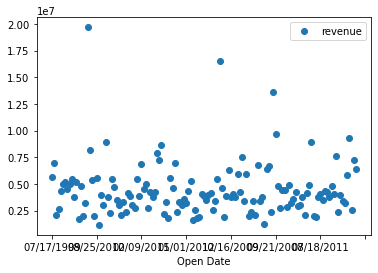

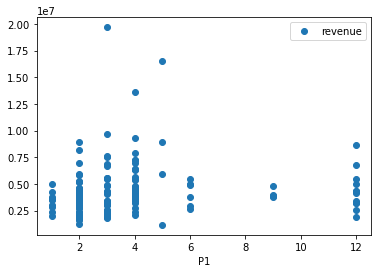

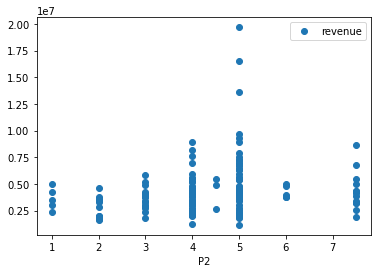

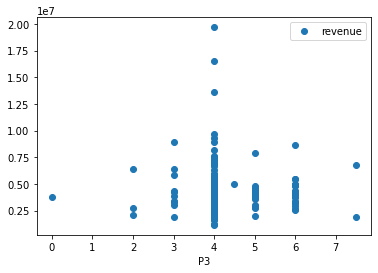

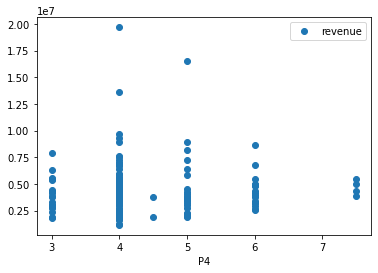

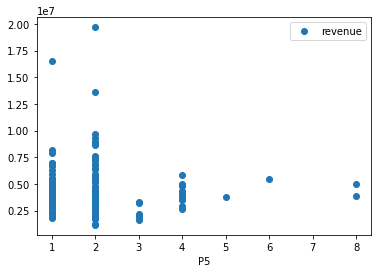

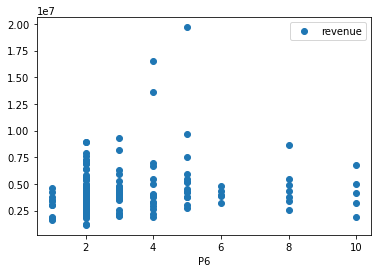

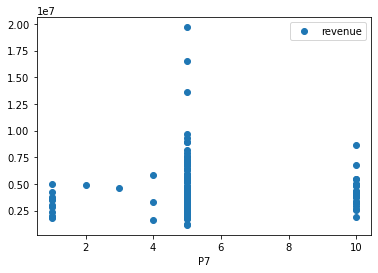

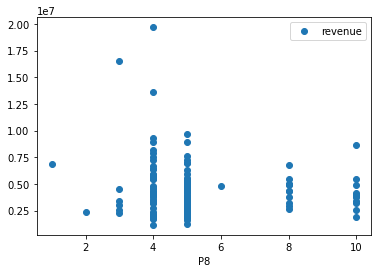

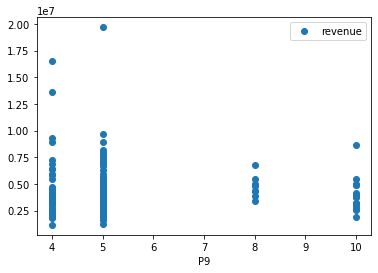

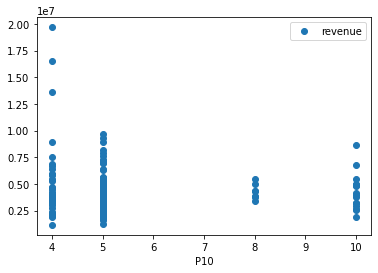

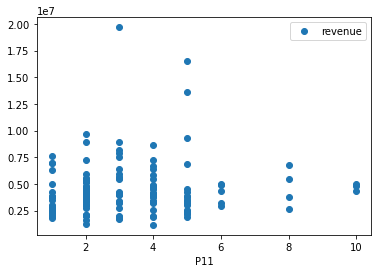

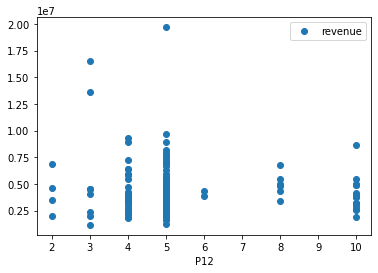

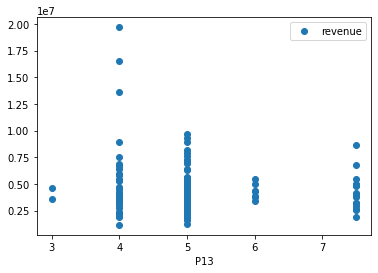

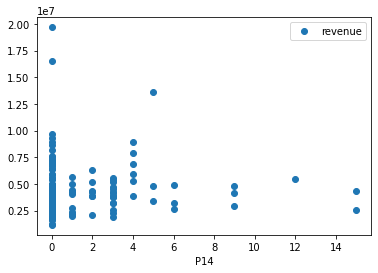

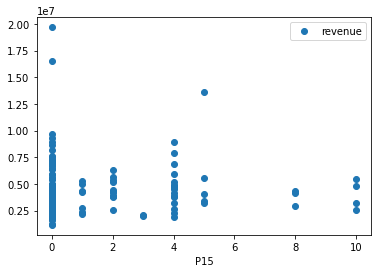

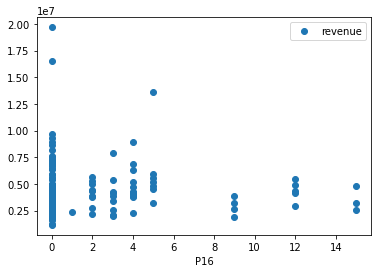

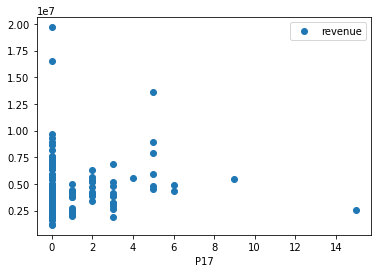

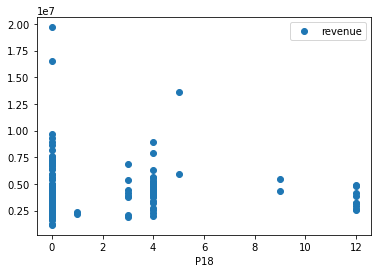

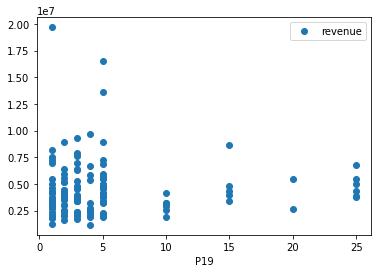

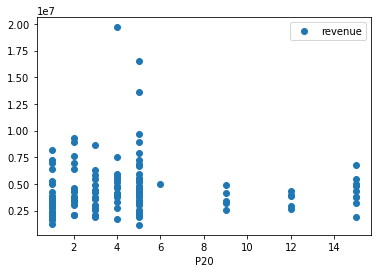

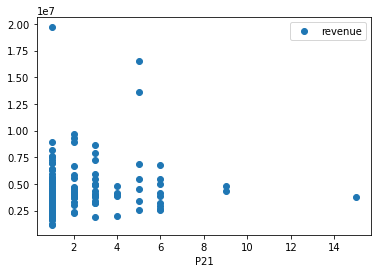

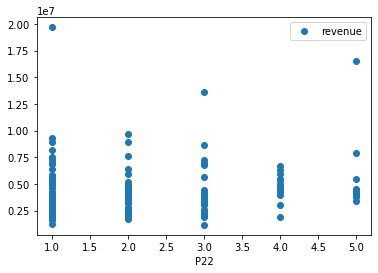

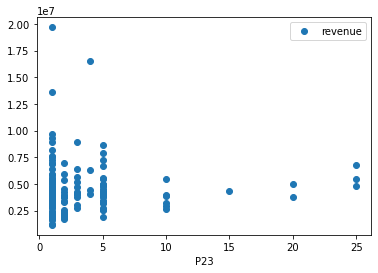

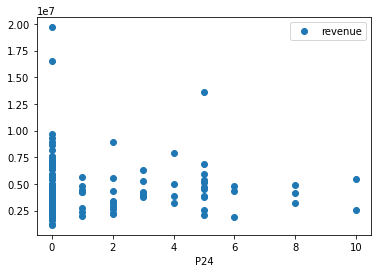

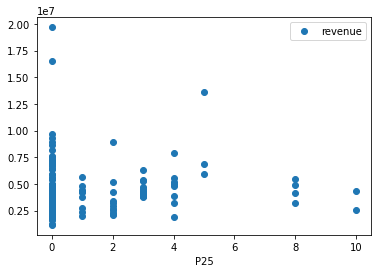

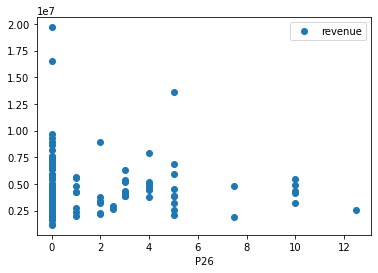

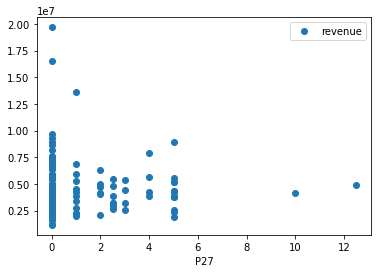

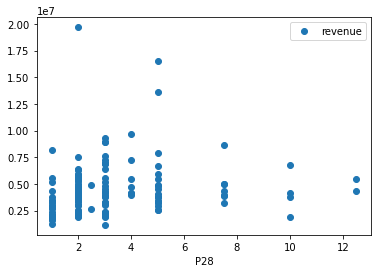

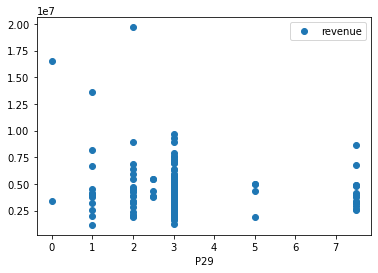

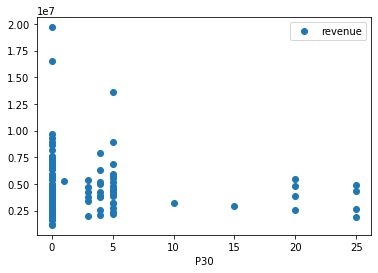

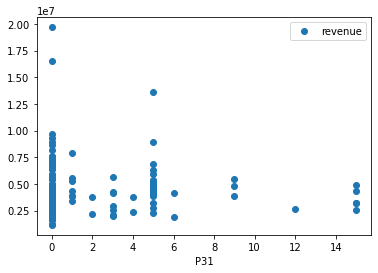

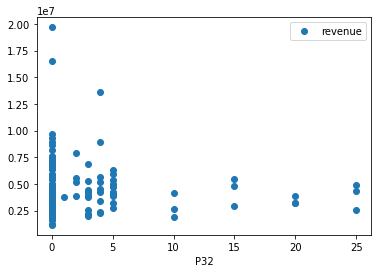

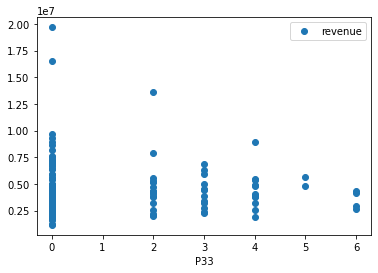

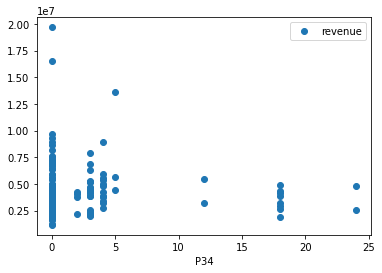

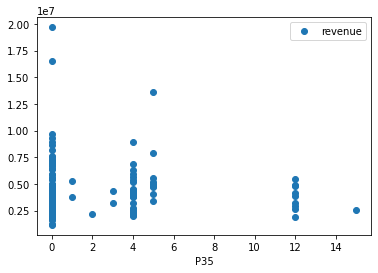

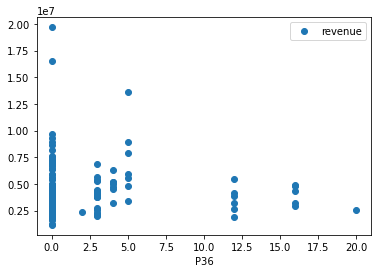

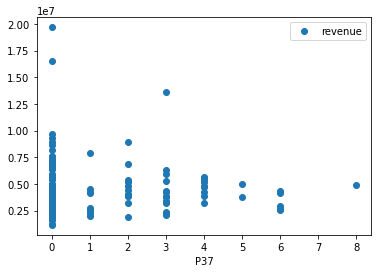

In [7]:
column_list=reg_res_data.columns.tolist()

for var_name in column_list:
    print(var_name)
    reg_res_data.plot(x=var_name, y='revenue', style='o')

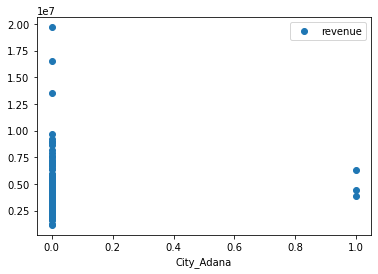

In [35]:
new_data.plot(x="City_Adana", y='revenue', style='o')

In [8]:
#run a regression on everything using random forrest regressor 

from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns

import time
from datetime import datetime

#test_df['Date'].dt.strftime("%Y%m%d").astype(int)

#new_data['Days'] = pd.to_datetime(new_data['Open Date'])

#new_data['Days'].dt.strftime("%Y%m%d").astype(int)

new_data["Days"] = pd.to_datetime(new_data['Open Date']).dt.strftime("%Y%m%d")

x_train=new_data.drop(['revenue', 'Open Date'],axis=1)

y_train=new_data['revenue']

cls=RandomForestRegressor(n_estimators=200)

results=cls.fit(x_train, y_train)


In [40]:
print(results)

RandomForestRegressor(n_estimators=200)


In [41]:
print(cls.fit(x_train, y_train))

RandomForestRegressor(n_estimators=200)


In [11]:
l4=[]
ww=cls.score(x_train, y_train)
l4.append(ww)
l4.append(cls.score(x_train, y_train))
print(l4)

[0.8559637502767999, 0.8559637502767999]


In [45]:
RandomForestRegressor.get_params(results)

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 200,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [3]:
l2=[5,26,64,665]
l1=[1,2,4,5]
diction={}

for n,i in enumerate(l1):
    diction[i]=l2[n]
    
print(diction)
    



#https://www.kaggle.com/ani310/restaurant-revenue
#https://www.kaggle.com/ayushikaushik/eda-regression-analysis

{1: 5, 2: 26, 4: 64, 5: 665}
